**Finlatics Project on Facebook Marketplace dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('facebook_marketplace.csv')

df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [ ]:
df.shape

(7050, 16)

In [ ]:

df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'])


print("Columns after removal:", df.columns)


Columns after removal: Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')


In [ ]:
# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())


Missing values before handling:
 status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


In [ ]:
# One-hot encode 'status_type' column
df_encoded = pd.get_dummies(df, columns=['status_type'], drop_first=True)

# Display first few rows of the encoded dataframe
print(df_encoded.head())


   status_id status_published  num_reactions  num_comments  num_shares  \
0          1   4/22/2018 6:00            529           512         262   
1          2  4/21/2018 22:45            150             0           0   
2          3   4/21/2018 6:17            227           236          57   
3          4   4/21/2018 2:29            111             0           0   
4          5   4/18/2018 3:22            213             0           0   

   num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  \
0        432         92         3          1         1           0   
1        150          0         0          0         0           0   
2        204         21         1          1         0           0   
3        111          0         0          0         0           0   
4        204          9         0          0         0           0   

   status_type_photo  status_type_status  status_type_video  
0              False               False               True  
1         

1. Analyzing How the Time of Upload (status_published) Affects the num_reactions

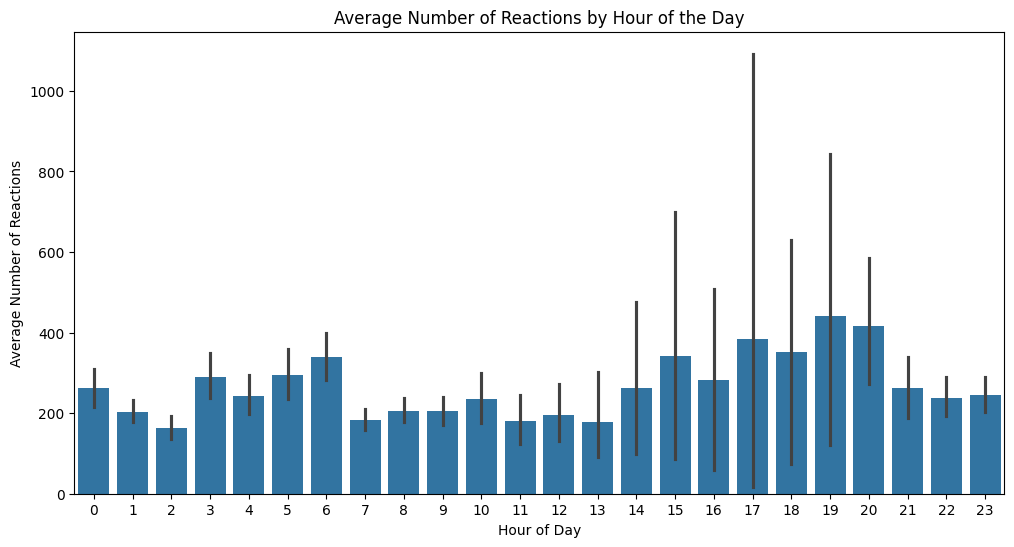

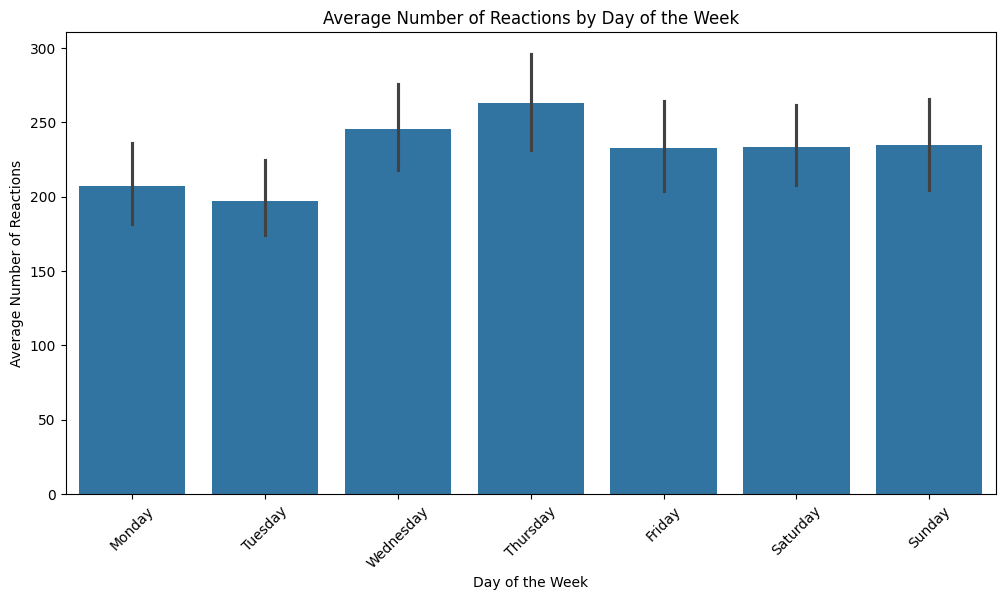

In [ ]:
# Convert 'status_published' to datetime format
df_encoded['status_published'] = pd.to_datetime(df_encoded['status_published'])

df_encoded['publish_hour'] = df_encoded['status_published'].dt.hour
df_encoded['publish_day'] = df_encoded['status_published'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.barplot(x='publish_hour', y='num_reactions', data=df_encoded)
plt.title('Average Number of Reactions by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Reactions')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='publish_day', y='num_reactions', data=df_encoded,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Number of Reactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Reactions')
plt.xticks(rotation=45)
plt.show()


2. Correlation Between num_reactions and Other Engagement Metrics

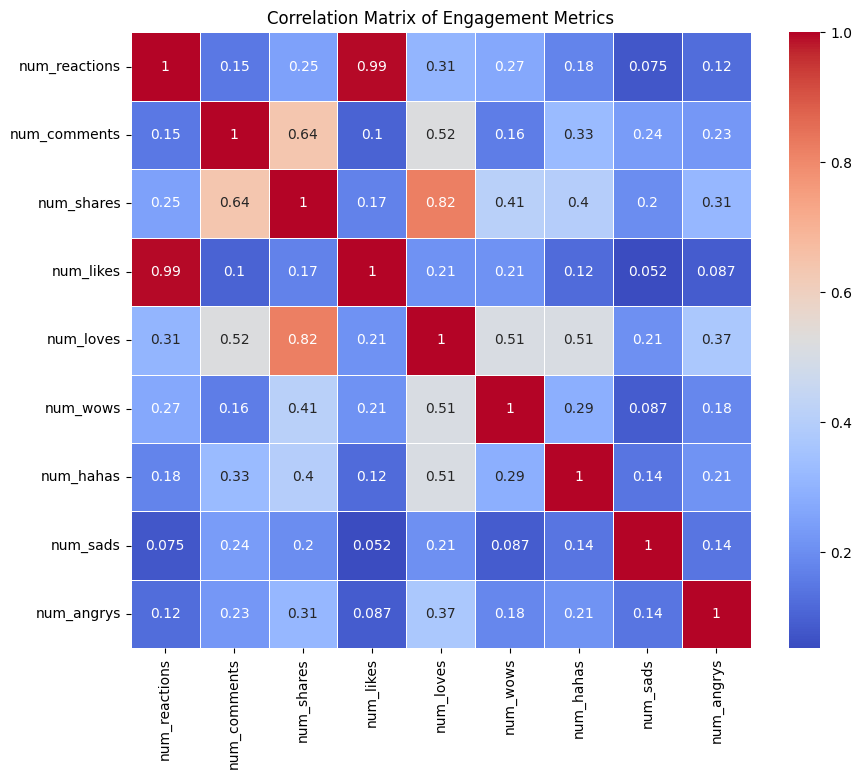

In [ ]:
correlation_matrix = df_encoded[['num_reactions', 'num_comments', 'num_shares', 'num_likes',
                                 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()


3. K-Means Clustering on the Dataset

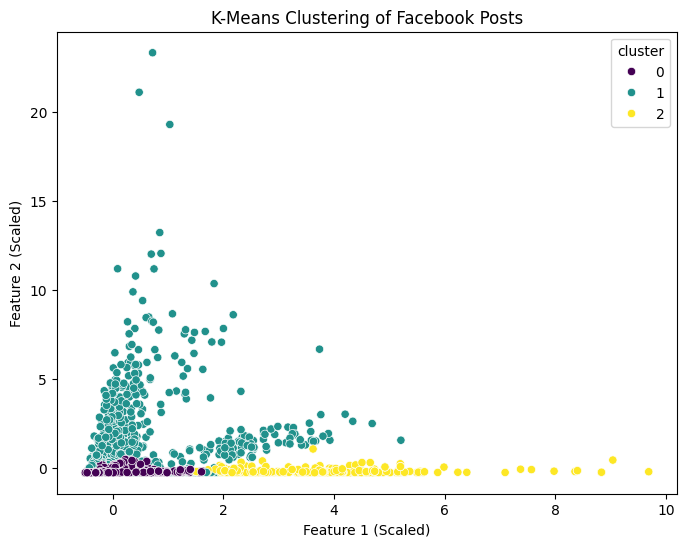

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes',
            'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys',
            'status_type_photo', 'status_type_status', 'status_type_video']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[features])

kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=df_encoded['cluster'], palette='viridis')
plt.title('K-Means Clustering of Facebook Posts')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()


4. Finding the Optimum Number of Clusters Using the Elbow Method

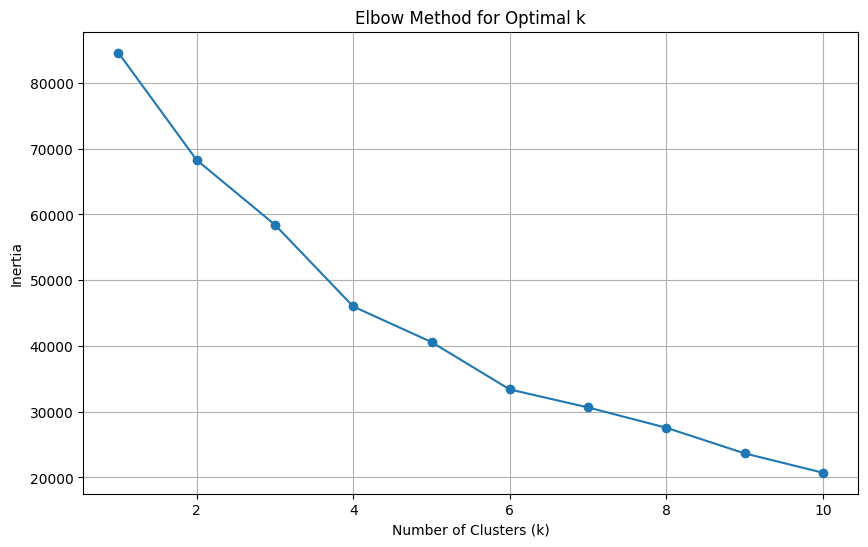

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


5. Count of Different Types of Posts

In [ ]:
post_type_counts = df_encoded[['status_type_photo', 'status_type_status', 'status_type_video']].sum()
print("Count of different post types:\n", post_type_counts)

Count of different post types:
 status_type_photo     4288
status_type_status     365
status_type_video     2334
dtype: int64


6. Average Values of num_reactions, num_comments, num_shares for Each Post Type

In [ ]:
df_encoded['post_type'] = df_encoded[['status_type_photo', 'status_type_status', 'status_type_video']].idxmax(axis=1)
avg_values = df_encoded.groupby('post_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print("Average Values for Each Post Type:\n", avg_values)

Average Values for Each Post Type:
                     num_reactions  num_comments  num_shares
post_type                                                  
status_type_photo      184.024822     15.844404    2.580556
status_type_status     438.783562     36.238356    2.558904
status_type_video      283.409597    642.478149  115.679949
